In [ ]:
!pip install mysql.connector
! pip install pymysql
import mysql.connector
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/dpd_zero.csv')

In [ ]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [ ]:
df.head(4)

,amount_pending,state,tenure,interest_rate,city,bounce_string,disbursed_amount,loan_number
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS


In [ ]:
def classify_risk(bounce_history):
    # Extract the last 6 months of behavior
    last_six_months = bounce_history[-6:]

    # Count the number of bounces in the last 6 months
    bounce_count = last_six_months.count('B') + last_six_months.count('L')

    # Determine risk level
    if 'F' in last_six_months:
        return 'unknown_risk'
    elif bounce_count == 0:
        return 'low_risk'
    elif bounce_count <= 2 and last_six_months[-1] not in ['B', 'L']:
        return 'medium_risk'
    else:
        return 'high_risk'


In [ ]:
df

,amount_pending,state,tenure,interest_rate,city,bounce_string,disbursed_amount,loan_number
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA
...,...,...,...,...,...,...,...,...
24577,899,Andhra Pradesh,8,0.00,Chittoor,FEMI,7192,EAX5C
24578,2699,Andhra Pradesh,8,0.00,Krishna,FEMI,21592,5MCE9
24579,1540,Andhra Pradesh,8,0.00,Krishna,FEMI,12320,9HO4Q
24580,824,Andhra Pradesh,8,0.00,Guntur,FEMI,6592,3VV72


In [ ]:
df['risk_label'] = df['bounce_string'].apply(classify_risk)


In [ ]:
df

,amount_pending,state,tenure,interest_rate,city,bounce_string,disbursed_amount,loan_number,risk_label
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,low_risk
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,high_risk
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,medium_risk
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,low_risk
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,high_risk
...,...,...,...,...,...,...,...,...,...
24577,899,Andhra Pradesh,8,0.00,Chittoor,FEMI,7192,EAX5C,unknown_risk
24578,2699,Andhra Pradesh,8,0.00,Krishna,FEMI,21592,5MCE9,unknown_risk
24579,1540,Andhra Pradesh,8,0.00,Krishna,FEMI,12320,9HO4Q,unknown_risk
24580,824,Andhra Pradesh,8,0.00,Guntur,FEMI,6592,3VV72,unknown_risk


In [ ]:
def classify_tenure(tenure_months):
    if tenure_months == 3:
        return 'early_tenure'
    elif tenure_months >= 12:  # Assuming the loan is for a total of 15 months
        return 'late_tenure'
    else:
        return 'mid_tenure'


In [ ]:
df['tenure_label'] = df['tenure'].apply(classify_tenure)


In [ ]:
# Sort by 'Amount Pending'
df = df.sort_values(by='amount_pending')

# Calculate cumulative sum and total
df['cumulative_sum'] = df['amount_pending'].cumsum()
total_sum = df['amount_pending'].sum()

# Define cohorts
df['ticket_size'] = pd.cut(df['cumulative_sum'],
                                   bins=3,
                                   labels=['low_ticket_size', 'medium_ticket_size', 'high_ticket_size'])


In [ ]:
df

,amount_pending,state,tenure,interest_rate,city,bounce_string,disbursed_amount,loan_number,risk_label,tenure_label,cumulative_sum,ticket_size
1534,423,Maharashtra,11,11.84,Sangli,FEMI,4389,HEMS0,unknown_risk,mid_tenure,423,low_ticket_size
1982,444,Tamil Nadu,11,12.23,VIRUDHUNAGAR,FEMI,4598,1BYJD,unknown_risk,mid_tenure,867,low_ticket_size
889,451,Maharashtra,7,37.92,Pune,LSSSSB,2793,7COLC,high_risk,mid_tenure,1318,low_ticket_size
265,522,Karnataka,11,12.83,Bagalkot,FEMI,5390,587TX,unknown_risk,mid_tenure,1840,low_ticket_size
1486,522,Maharashtra,11,12.83,Pune,S,5390,5QJN0,low_risk,mid_tenure,2362,low_ticket_size
...,...,...,...,...,...,...,...,...,...,...,...,...
9776,12500,Maharashtra,8,0.00,Kolhapur,LLSSSSS,100000,8MQRY,medium_risk,mid_tenure,43979758,high_ticket_size
13946,12500,Maharashtra,8,0.00,Pune,S,100000,1R840,low_risk,mid_tenure,43992258,high_ticket_size
23089,12500,Kerala,8,0.00,MALAPPURAM,S,100000,QUV9D,low_risk,mid_tenure,44004758,high_ticket_size
14009,12500,Maharashtra,8,0.00,Sangli,S,100000,66HA4,low_risk,mid_tenure,44017258,high_ticket_size


In [ ]:
# Define a threshold rate for low interest
threshold_rate = 10  # Example value, adjust according to your dataset


In [ ]:
def recommend_channel(row):
    if row['risk_label'] == 'low_risk' and row['bounce_string'][-1] not in ['B', 'L']:
        return 'whatsapp_bot'
    elif (row['risk_label'] in ['medium_risk', 'low_risk'] and
          (row['interest_rate'] < threshold_rate) and
          row['tenure_label'] in ['low_emis', 'medium_emis']):
        return 'voice_bot'
    else:
        return 'human_call'

df['spend_channel'] = df.apply(recommend_channel, axis=1)


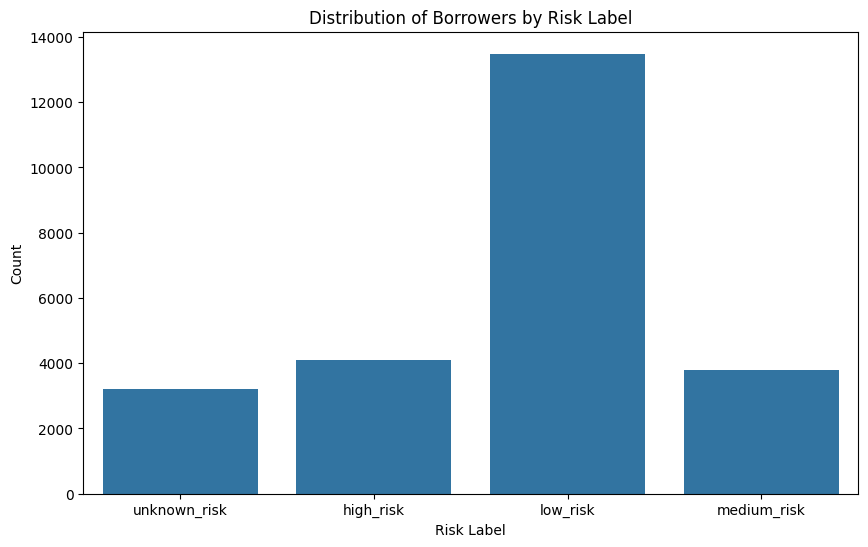

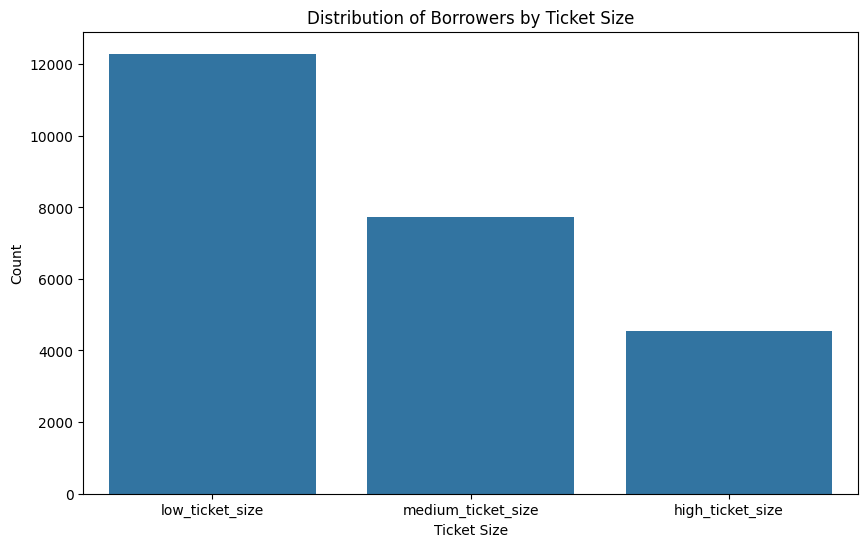

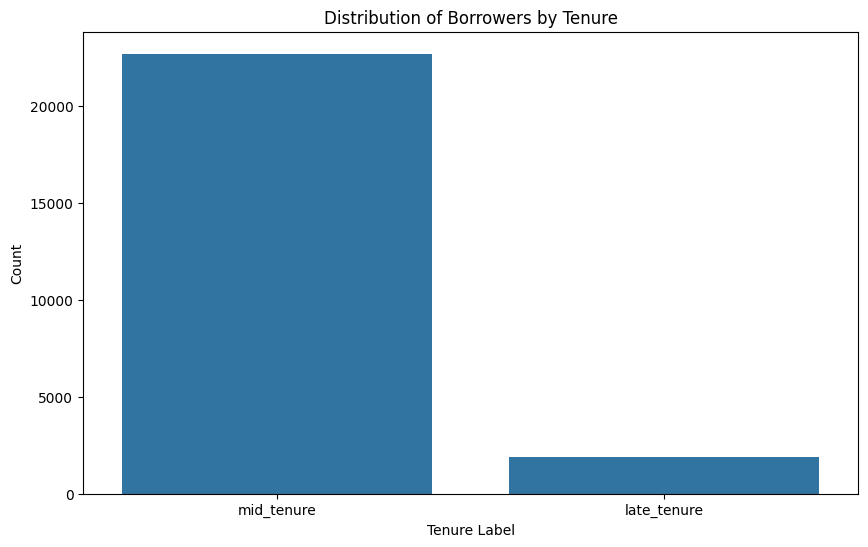

In [ ]:
# Risk Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='risk_label')
plt.title('Distribution of Borrowers by Risk Label')
plt.xlabel('Risk Label')
plt.ylabel('Count')
plt.show()

# Ticket Size Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ticket_size')
plt.title('Distribution of Borrowers by Ticket Size')
plt.xlabel('Ticket Size')
plt.ylabel('Count')
plt.show()

# Tenure Completion
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='tenure_label')
plt.title('Distribution of Borrowers by Tenure')
plt.xlabel('Tenure Label')
plt.ylabel('Count')
plt.show()


In [ ]:

# 1. Total Bounces
df['total_bounces'] = df['bounce_string'].apply(lambda x: x.count('B') + x.count('L'))

# 2. Last Bounce Month
def last_bounce_month(bounce_string):
    bounce_positions = [i for i, char in enumerate(bounce_string) if char in ['B', 'L']]
    return len(bounce_string) - 1 if not bounce_positions else bounce_positions[-1]

df['last_bounce_month'] = df['bounce_string'].apply(last_bounce_month)

# 3. Months Since Last Payment
df['months_since_last_payment'] = df['bounce_string'].apply(lambda x: len(x) - last_bounce_month(x) - 1)

# 4. Loan-to-Value Ratio (LTV) - Placeholder for market value
market_value = 200000  # Example placeholder value
df['ltv_ratio'] = df['disbursed_amount'] / market_value

# 5. Debt-to-Income Ratio (DTI) - Placeholder for income
income_data = [50000, 60000, 70000, 80000, 90000]  # Example placeholder income values
# Ensure the length matches your dataset
if len(income_data) == len(df):
    df['income'] = income_data
    df['dti_ratio'] = df['disbursed_amount'] / df['income']
else:
    df['dti_ratio'] = None  # Placeholder if income data is not available

# 6. Urban vs. Rural Classification
urban_cities = ['CityA', 'CityB', 'CityC']  # Example urban cities
df['urban_rural'] = df['city'].apply(lambda x: 'urban' if x in urban_cities else 'rural')

# 7. Payment Term Type
df['payment_term_type'] = df['interest_rate'].apply(lambda x: 'fixed' if x < 10 else 'variable')

# 8. Previous Loan History - Placeholder for previous loan counts
previous_loan_counts = [1, 2, 0, 3, 1]  # Example previous loan counts
# Ensure the length matches your dataset
if len(previous_loan_counts) == len(df):
    df['previous_loan_count'] = previous_loan_counts
else:
    df['previous_loan_count'] = None  # Placeholder if previous loan data is not available

# 9. Time on Book
df['time_on_book'] = df['bounce_string'].apply(len)

# 10. Risk by Tenure
df['risk_tenure'] = df['risk_label'] + '_' + df['tenure_label']

# 11. Bounce Rate
df['bounce_rate'] = df['total_bounces'] / df['time_on_book']


In [ ]:
df

,amount_pending,state,tenure,interest_rate,city,bounce_string,disbursed_amount,loan_number,risk_label,tenure_label,...,last_bounce_month,months_since_last_payment,ltv_ratio,dti_ratio,urban_rural,payment_term_type,previous_loan_count,time_on_book,risk_tenure,bounce_rate
1534,423,Maharashtra,11,11.84,Sangli,FEMI,4389,HEMS0,unknown_risk,mid_tenure,...,3,0,0.021945,None,rural,variable,None,4,unknown_risk_mid_tenure,0.000000
1982,444,Tamil Nadu,11,12.23,VIRUDHUNAGAR,FEMI,4598,1BYJD,unknown_risk,mid_tenure,...,3,0,0.022990,None,rural,variable,None,4,unknown_risk_mid_tenure,0.000000
889,451,Maharashtra,7,37.92,Pune,LSSSSB,2793,7COLC,high_risk,mid_tenure,...,5,0,0.013965,None,rural,variable,None,6,high_risk_mid_tenure,0.333333
265,522,Karnataka,11,12.83,Bagalkot,FEMI,5390,587TX,unknown_risk,mid_tenure,...,3,0,0.026950,None,rural,variable,None,4,unknown_risk_mid_tenure,0.000000
1486,522,Maharashtra,11,12.83,Pune,S,5390,5QJN0,low_risk,mid_tenure,...,0,0,0.026950,None,rural,variable,None,1,low_risk_mid_tenure,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9776,12500,Maharashtra,8,0.00,Kolhapur,LLSSSSS,100000,8MQRY,medium_risk,mid_tenure,...,1,5,0.500000,None,rural,fixed,None,7,medium_risk_mid_tenure,0.285714
13946,12500,Maharashtra,8,0.00,Pune,S,100000,1R840,low_risk,mid_tenure,...,0,0,0.500000,None,rural,fixed,None,1,low_risk_mid_tenure,0.000000
23089,12500,Kerala,8,0.00,MALAPPURAM,S,100000,QUV9D,low_risk,mid_tenure,...,0,0,0.500000,None,rural,fixed,None,1,low_risk_mid_tenure,0.000000
14009,12500,Maharashtra,8,0.00,Sangli,S,100000,66HA4,low_risk,mid_tenure,...,0,0,0.500000,None,rural,fixed,None,1,low_risk_mid_tenure,0.000000


In [ ]:
# load part
conn = mysql.connector.connect(host='DB_url',user='userName',password='password')


In [ ]:
mycursor = conn.cursor()

In [ ]:
mycursor.execute('CREATE DATABASE db_name')
conn.commit()

In [ ]:
engine = create_engine("mysql+pymysql://userName:password@db_url/db_name")
# {root}:{password}@{url}/{database}
df.to_sql('dpd', con = engine)


24582